In [2]:
cg = fits.open('../plane_gaiadr2_dust_06_12_19.fits')[1].data
mol = Table.read('../molclouds.txt',format='ascii')

### Select clouds from catalog based on distance

In [3]:
def cloudlim(n):
    q = np.where((cg['gl'] > mol['llower'][n]) & (cg['gl'] < mol['lupper'][n]) & (cg['gb'] > mol['blower'][n]) & (cg['gb'] < mol['bupper'][n]))# & (cg['dist'] > mol['dist'][n]-100) & (cg['dist'] < mol['dist'][n]+100))
    return q
c0 = cg[cloudlim(0)]
c1 = cg[cloudlim(1)]
c2 = cg[cloudlim(2)]
c3 = cg[cloudlim(3)]
c4 = cg[cloudlim(4)]
c5 = cg[cloudlim(5)]
c6 = cg[cloudlim(6)]
c7 = cg[cloudlim(7)]
c8 = cg[cloudlim(8)]
c9 = cg[cloudlim(9)]
c10 = cg[cloudlim(10)]
cs = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])

In [4]:
mol

name,llower,lupper,blower,bupper,ebv,dist,d_err_stat,d_err_syst
str10,float64,float64,float64,float64,float64,float64,float64,float64
CMaOB1,223.0,227.0,-3.0,0.0,2.0,1209.0,4.0,60.0
California,160.0,166.0,-10.0,-7.5,1.0,470.0,2.0,24.0
Crossbones,218.5,220.0,-11.0,-7.5,1.0,886.0,4.0,44.0
GemOB1,188.5,193.5,-1.0,2.5,2.0,1786.0,4.0,89.0
Hercules,42.0,47.0,7.5,10.0,0.5,227.0,1.0,11.0
Lacerta,94.0,97.0,-12.0,-8.0,0.5,503.0,5.0,25.0
Maddalena,216.0,219.0,-3.0,1.0,2.0,2072.0,6.0,104.0
MonOB1,199.0,204.0,0.0,3.0,2.0,745.0,3.0,37.0
OrionLam,191.5,200.0,-17.0,-7.0,0.5,402.0,1.0,20.0


In [5]:
print(mol['name'][0]+' = '+str(len(c0)))
print(mol['name'][1]+' = '+str(len(c1)))
print(mol['name'][2]+' = '+str(len(c2)))
print(mol['name'][3]+' = '+str(len(c3)))
print(mol['name'][4]+' = '+str(len(c4)))
print(mol['name'][5]+' = '+str(len(c5)))
print(mol['name'][6]+' = '+str(len(c6)))
print(mol['name'][7]+' = '+str(len(c7)))
print(mol['name'][8]+' = '+str(len(c8)))
print(mol['name'][9]+' = '+str(len(c9)))
print(mol['name'][10]+' = '+str(len(c10)))

CMaOB1 = 6443
California = 929
Crossbones = 854
GemOB1 = 1632
Hercules = 2205
Lacerta = 2430
Maddalena = 10535
MonOB1 = 3961
OrionLam = 2741
Rosette = 3056
SerpensAqR = 796


In [6]:
areas = (mol['lupper']-mol['llower'])*(mol['bupper']-mol['blower'])

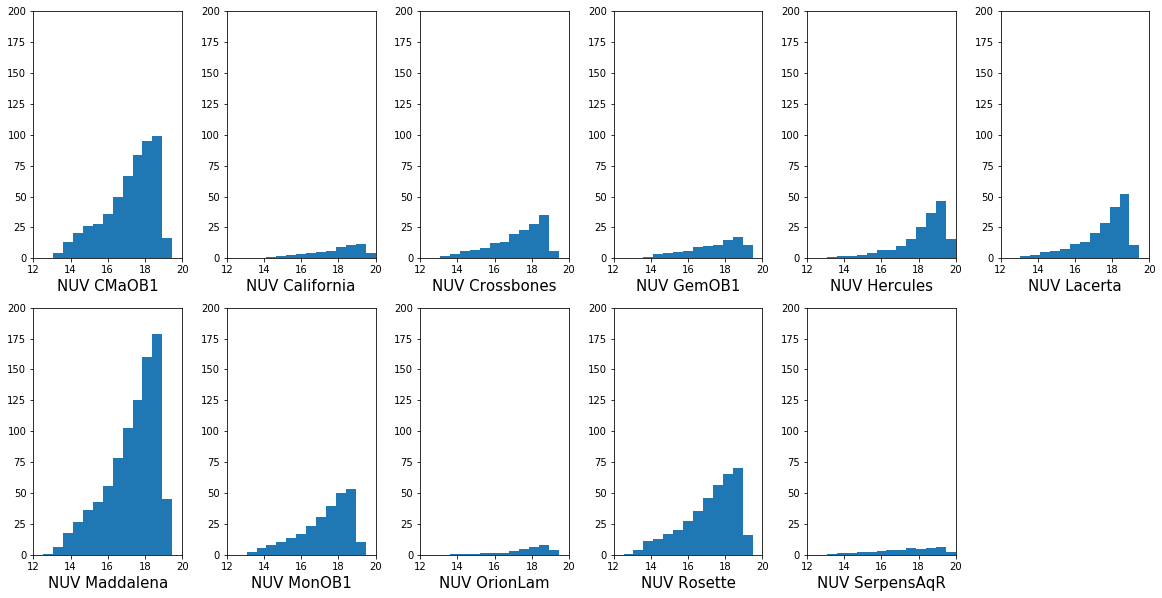

In [7]:
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(20, 10))
for i in range(1, 12):
    ax = fig.add_subplot(2, 6, i)
    cat = cs[i-1]
    x, bins, p = plt.hist(cat['nuv'], range=[12, 20], bins=15)
    for item in p:
        item.set_height(item.get_height()/areas[i-1])
    plt.xlim(12, 20)
    plt.ylim(0, 200)
    plt.xlabel('NUV '+mol['name'][i-1], fontsize=15)
plt.subplots_adjust(wspace=0.3)
plt.show()

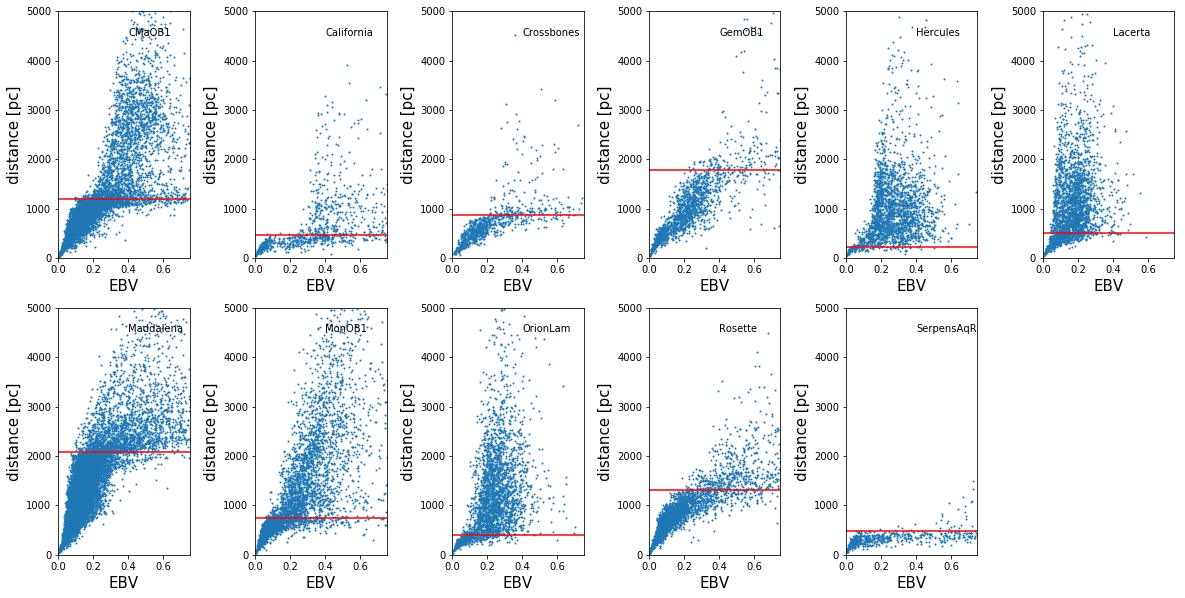

In [8]:
fig = plt.figure(figsize=(20, 10))
for i in range(1, 12):
    ax = fig.add_subplot(2, 6, i)
    cat = cs[i-1]
    #plt.scatter((cat['nuv']-cat['ebv']*7.24)-(cat['phot_g_mean_mag']-cat['ebv']*2.85), cat['dist'],c=cat['phot_g_mean_mag']-cat['distmod'], s=1, alpha=0.1)
    #plt.scatter((cat['nuv'])-(cat['phot_g_mean_mag']), cat['dist'], s=1, alpha=0.1)
    plt.scatter(cat['ebv'], cat['dist'], s=1)

    #plt.xlabel('(NUV-G)$_0$', fontsize=15)
    plt.xlabel('EBV', fontsize=15)
    plt.ylabel('distance [pc]', fontsize=15)
    plt.xlim(0, 0.75)
    plt.ylim(0, 5000)
    plt.axhline(y=mol['dist'][i-1], c='red')
    plt.text(0.4, 4500, mol['name'][i-1])
plt.subplots_adjust(wspace=0.5)
plt.show()

### Load in Gaia data for these regions

In [9]:
g0 = Table.read('../molclouds_gaia/cmaob1-result.txt', format='ascii')
g1 = Table.read('../molclouds_gaia/California-result.txt', format='ascii')
g2 = Table.read('../molclouds_gaia/Crossbones-result.txt', format='ascii')
g3 = Table.read('../molclouds_gaia/GemOB1-result.txt', format='ascii')
g4 = Table.read('../molclouds_gaia/hercules-result.txt', format='ascii')
g5 = Table.read('../molclouds_gaia/lacerta-result.txt', format='ascii')
g6 = Table.read('../molclouds_gaia/Maddalena-result.txt', format='ascii')
g7 = Table.read('../molclouds_gaia/MonOB1-result.txt', format='ascii')
g8 = Table.read('../molclouds_gaia/OrionLam-result.txt', format='ascii')
g9 = Table.read('../molclouds_gaia/Rosette-result.txt', format='ascii')
g10 = Table.read('../molclouds_gaia/serpens-result.txt', format='ascii')

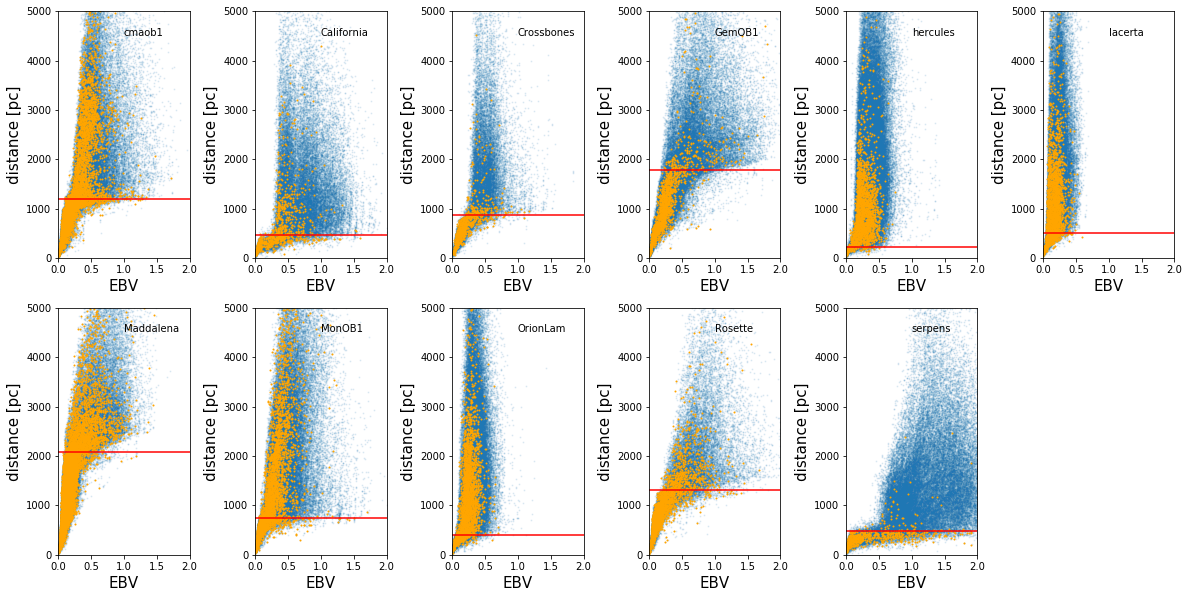

In [10]:
clouds = ['cmaob1-result.txt', 'California-result.txt', 'Crossbones-result.txt', 'GemOB1-result.txt', 'hercules-result.txt', 'lacerta-result.txt', 'Maddalena-result.txt', 'MonOB1-result.txt', 'OrionLam-result.txt', 'Rosette-result.txt', 'serpens-result.txt']

g = [g0, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10]

fig = plt.figure(figsize=(20, 10))
for i in range(1, 12):
    ax = fig.add_subplot(2, 6, i)
    cat = g[i-1]
    plt.scatter(cat['ebv'], cat['dist'], s=1, alpha=0.1)
    cat = cs[i-1]
    plt.scatter(cat['ebv'], cat['dist'], s=1, color='orange')
    plt.xlabel('EBV', fontsize=15)
    plt.ylabel('distance [pc]', fontsize=15)
    plt.xlim(0, 2)
    plt.ylim(0, 5000)
    plt.axhline(y=mol['dist'][i-1], c='red')
    plt.text(1, 4500, clouds[i-1][:-11])
plt.subplots_adjust(wspace=0.5)
plt.show()


## Now match each catalog to see what is missing from GALEX

In [10]:
g0gal = SkyCoord(g0['ra']*u.deg, g0['dec']*u.deg, frame='icrs')
g1gal = SkyCoord(g1['ra']*u.deg, g1['dec']*u.deg, frame='icrs')
g2gal = SkyCoord(g2['ra']*u.deg, g2['dec']*u.deg, frame='icrs')
g3gal = SkyCoord(g3['ra']*u.deg, g3['dec']*u.deg, frame='icrs')
g4gal = SkyCoord(g4['ra']*u.deg, g4['dec']*u.deg, frame='icrs')
g5gal = SkyCoord(g5['ra']*u.deg, g5['dec']*u.deg, frame='icrs')
g6gal = SkyCoord(g6['ra']*u.deg, g6['dec']*u.deg, frame='icrs')
g7gal = SkyCoord(g7['ra']*u.deg, g7['dec']*u.deg, frame='icrs')
g8gal = SkyCoord(g8['ra']*u.deg, g8['dec']*u.deg, frame='icrs')
g9gal = SkyCoord(g9['ra']*u.deg, g9['dec']*u.deg, frame='icrs')
g10gal = SkyCoord(g10['ra']*u.deg, g10['dec']*u.deg, frame='icrs')

c0gal = SkyCoord(c0['ra_gaia']*u.deg, c0['dec_gaia']*u.deg, frame='icrs')
c1gal = SkyCoord(c1['ra_gaia']*u.deg, c1['dec_gaia']*u.deg, frame='icrs')
c2gal = SkyCoord(c2['ra_gaia']*u.deg, c2['dec_gaia']*u.deg, frame='icrs')
c3gal = SkyCoord(c3['ra_gaia']*u.deg, c3['dec_gaia']*u.deg, frame='icrs')
c4gal = SkyCoord(c4['ra_gaia']*u.deg, c4['dec_gaia']*u.deg, frame='icrs')
c5gal = SkyCoord(c5['ra_gaia']*u.deg, c5['dec_gaia']*u.deg, frame='icrs')
c6gal = SkyCoord(c6['ra_gaia']*u.deg, c6['dec_gaia']*u.deg, frame='icrs')
c7gal = SkyCoord(c7['ra_gaia']*u.deg, c7['dec_gaia']*u.deg, frame='icrs')
c8gal = SkyCoord(c8['ra_gaia']*u.deg, c8['dec_gaia']*u.deg, frame='icrs')
c9gal = SkyCoord(c9['ra_gaia']*u.deg, c9['dec_gaia']*u.deg, frame='icrs')
c10gal = SkyCoord(c10['ra_gaia']*u.deg, c10['dec_gaia']*u.deg, frame='icrs')

c0ind, g0ind, ang0, ang3d = search_around_sky(c0gal, g0gal, 2*u.arcsec)
c1ind, g1ind, ang1, ang3d = search_around_sky(c1gal, g1gal, 2*u.arcsec)
c2ind, g2ind, ang2, ang3d = search_around_sky(c2gal, g2gal, 2*u.arcsec)
c3ind, g3ind, ang3, ang3d = search_around_sky(c3gal, g3gal, 2*u.arcsec)
c4ind, g4ind, ang4, ang3d = search_around_sky(c4gal, g4gal, 2*u.arcsec)
c5ind, g5ind, ang5, ang3d = search_around_sky(c5gal, g5gal, 2*u.arcsec)
c6ind, g6ind, ang6, ang3d = search_around_sky(c6gal, g6gal, 2*u.arcsec)
c7ind, g7ind, ang7, ang3d = search_around_sky(c7gal, g7gal, 2*u.arcsec)
c8ind, g8ind, ang8, ang3d = search_around_sky(c8gal, g8gal, 2*u.arcsec)
c9ind, g9ind, ang9, ang3d = search_around_sky(c9gal, g9gal, 2*u.arcsec)
c10ind, g10ind, ang10, ang3d = search_around_sky(c10gal, g10gal, 2*u.arcsec)

cg0 = hstack([Table(c0)[c0ind], g0[g0ind]])
cg1 = hstack([Table(c1)[c1ind], g1[g1ind]])
cg2 = hstack([Table(c2)[c2ind], g2[g2ind]])
cg3 = hstack([Table(c3)[c3ind], g3[g3ind]])
cg4 = hstack([Table(c4)[c4ind], g4[g4ind]])
cg5 = hstack([Table(c5)[c5ind], g5[g5ind]])
cg6 = hstack([Table(c6)[c6ind], g6[g6ind]])
cg7 = hstack([Table(c7)[c7ind], g7[g7ind]])
cg8 = hstack([Table(c8)[c8ind], g8[g8ind]])
cg9 = hstack([Table(c9)[c9ind], g9[g9ind]])
cg10 = hstack([Table(c10)[c10ind], g10[g10ind]])

In [12]:
print(mol['name'][0]+' = '+str(len(g0)))
print(mol['name'][1]+' = '+str(len(g1)))
print(mol['name'][2]+' = '+str(len(g2)))
print(mol['name'][3]+' = '+str(len(g3)))
print(mol['name'][4]+' = '+str(len(g4)))
print(mol['name'][5]+' = '+str(len(g5)))
print(mol['name'][6]+' = '+str(len(g6)))
print(mol['name'][7]+' = '+str(len(g7)))
print(mol['name'][8]+' = '+str(len(g8)))
print(mol['name'][9]+' = '+str(len(g9)))
print(mol['name'][10]+' = '+str(len(g10)))

CMaOB1 = 87964
California = 40346
Crossbones = 27879
GemOB1 = 92383
Hercules = 124746
Lacerta = 61137
Maddalena = 94776
MonOB1 = 81575
OrionLam = 125887
Rosette = 38124
SerpensAqR = 63000


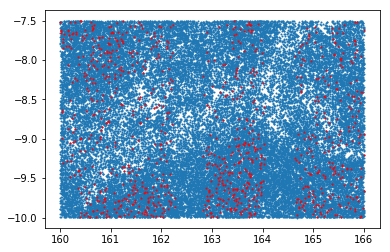

In [13]:
plt.scatter(g1['gl'], g1['gb'], s=1)
plt.scatter(c1['gl'], c1['gb'], s=1, c='red')
plt.show()